# 1. Load libraries and data

### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# MODELS
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# ERROR METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

import pickle

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2. Load data

In [3]:
data_import = pd.read_csv('W9 - ProjectData_3-int15.csv')
data_import.head()

,station_name,month,day_of_week,holiday,time_type,malfunction_cause,malfunction_cause_group,rain_bins,wind_bins,temp_bins,duration_15min_intervals
0,Almere Oostvaarders,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,k
1,Lelystad Centrum,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,k
2,Ermelo,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,b
3,Harderwijk,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,b
4,Putten,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,b


# 2. EDA

In [4]:
data_import['duration_15min_intervals'].value_counts()

b    3000
c    2771
d    1996
a    1547
e    1422
f    1176
g    1032
i     957
h     944
j     715
k     641
l     638
m     550
n     473
o     323
p     284
q     229
r     133
s     129
t      81
Name: duration_15min_intervals, dtype: int64

### 2.1. Data exploration

In [5]:
print("DATA SHAPE IS: ", data_import.shape)
print("")
print ("DATA DTYPES ARE: ") 
data_import.dtypes

DATA SHAPE IS:  (19041, 11)

DATA DTYPES ARE: 


station_name                object
month                       object
day_of_week                 object
holiday                     object
time_type                   object
malfunction_cause           object
malfunction_cause_group     object
rain_bins                   object
wind_bins                   object
temp_bins                   object
duration_15min_intervals    object
dtype: object

### 2.2. Checking for null values 
* there shouldn't be any, since this dataset was saved after cleaning.

### 2.3. Changing dtypes

* Not necessary

### 2.4. Dropping columns

In [6]:
data_import.columns

Index(['station_name', 'month', 'day_of_week', 'holiday', 'time_type',
       'malfunction_cause', 'malfunction_cause_group', 'rain_bins',
       'wind_bins', 'temp_bins', 'duration_15min_intervals'],
      dtype='object')

In [7]:
data = data_import.drop(['malfunction_cause_group'], axis = 1)

In [8]:
data.head()

,station_name,month,day_of_week,holiday,time_type,malfunction_cause,rain_bins,wind_bins,temp_bins,duration_15min_intervals
0,Almere Oostvaarders,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,k
1,Lelystad Centrum,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,k
2,Ermelo,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,b
3,Harderwijk,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,b
4,Putten,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,b


### 2.5. Divide data into dependent and independent variables

In [12]:
y = data[['duration_15min_intervals']]
X_prep = data.drop(['duration_15min_intervals'], axis=1)

In [13]:
y.head()

,duration_15min_intervals
0,k
1,k
2,b
3,b
4,b


### 2.6. One Hot Encoder
Applied to independent variables

In [14]:
cat = X_prep.columns
x = [j for i in cat for j in X_prep[i].unique()[1:]]

### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_prep)
encoded = encoder.transform(X_prep).toarray()
X = pd.DataFrame(encoded , columns = x)
X.head()

,Lelystad Centrum,Ermelo,Harderwijk,Putten,Culemborg,Geldermalsen,Houten Castellum,Amersfoort Centraal,Amersfoort Schothorst,Amersfoort Vathorst,'t Harde,Nijkerk,Nunspeet,Wezep,Zwolle,Gouda,Gouda Goverwelle,Woerden,Groningen Noord,Sauwerd,Schiphol Airport,Beesd,Leerdam,Kapelle-Biezelinge,Goes,Kruiningen-Yerseke,Hoofddorp,Leiden Centraal,Nieuw Vennep,Sassenheim,Coevorden,Dalen,Emmen,Emmen Zuid,Utrecht Centraal,Utrecht Terwijde,Vleuten,Utrecht Leidsche Rijn,Almelo,Wierden,Kaldenkirchen,Mönchengladbach Hbf,Viersen,Venlo,Boisheim,Breyell,Dülken,Breda,Rotterdam Centraal,Utrecht Overvecht,Den Haag Mariahoeve,Den Haag Laan v NOI,Driebergen-Zeist,Ede-Wageningen,Veenendaal-De Klomp,Maarn,Barneveld Centrum,Barneveld Noord,Ede Centrum,Lunteren,Hoevelaken,Barneveld Zuid,Arnhem Centraal,Bunnik,Oosterbeek,Wolfheze,Utrecht Vaartsche Rijn,Apeldoorn,Apeldoorn Osseveld,Deventer,Twello,'s-Hertogenbosch,Tilburg,Best,Boxtel,Eindhoven Centraal,Vught,Eindhoven Strijp-S,Dordrecht,Dordrecht Zuid,Oudenbosch,Roosendaal,Lage Zwaluwe,Zevenbergen,Hoogeveen,Meppel,Baarn,Hilversum,Bad Bentheim,Oldenzaal,Amsterdam Centraal,Amsterdam Muiderpoort,Amsterdam Science Park,Bussum Zuid,Diemen,Naarden-Bussum,Weesp,Hilversum Media Park,Veenendaal Centrum,Veenendaal West,Dalfsen,Gramsbergen,Hardenberg,Mariënberg,Ommen,Barendrecht,Rotterdam Lombardijen,Rotterdam Blaak,Rotterdam Stadion,Rotterdam Zuid,Zwijndrecht,Amsterdam Lelylaan,Amsterdam Sloterdijk,Tegelen,Helmond,Helmond Brandevoort,Helmond 't Hout,Hengelo,Hengelo Oost,Osnabrück Hbf,Rheine,Blerick,Venray,Nijmegen,Nijmegen Dukenburg,Wijchen,Nijmegen Goffert,Etten-Leur,Arnhem Velperpoort,Duiven,Emmerich,Zevenaar,Westervoort,Diemen Zuid,Oisterwijk,Arnhem Zuid,Elst,Nijmegen Lent,Bodegraven,Dronten,Den Helder,Den Helder Zuid,Delft,Delft Campus,De Vink,Den Haag HS,Den Haag Centraal,Den Haag Moerwijk,Rijswijk,Schiedam Centrum,Voorschoten,Amsterdam Zuid,Duivendrecht,Amsterdam RAI,Houten,Utrecht Lunetten,Echt,Roermond,Susteren,Sittard,Weert,Reuver,Swalmen,Leeuwarden,Mantgum,Sneek,Sneek Noord,Groningen Europapark,Groningen,Hoogezand-Sappemeer,Kropswolde,Martenshoek,Sappemeer Oost,Zuidbroek,Boxmeer,Cuijk,Mook Molenhoek,Nijmegen Heyendaal,Vierlingsbeek,Almere Centrum,Almere Buiten,Almere Parkwijk,Antwerpen-Centraal,Rijssen,Akkrum,Grou-Jirnsum,Heerenveen,Steenwijk,Wolvega,Heerenveen IJsstadion,Almelo de Riet,Borne,Enschede,Nijverdal,Raalte,Enschede Kennispark,Deventer Colmschate,Holten,Delden,Goor,Lochem,Zutphen,Hengelo Gezondheidspark,Arkel,Dordrecht Stadspolders,Hardinxveld-Giessendam,Gorinchem,Sliedrecht,Boven-Hardinxveld,Sliedrecht Baanhoek,Hardinxveld Blauwe Zoom,Breukelen,Maarssen,Utrecht Zuilen,Brummen,Dieren,Rheden,Breda-Prinsenbeek,Heemstede-Aerdenhout,Hillegom,Haarlem,Voorhout,Haarlem Spaarnwoude,Halfweg-Zwanenburg,Apeldoorn De Maten,Klarenbeek,Voorst-Empe,Alphen a/d Rijn,Boskoop,Waddinxveen,Waddinxveen Noord,Boskoop Snijdelwijk,Waddinxveen Triangel,Zaltbommel,Gilze-Rijen,Tilburg Reeshof,Tilburg Universiteit,'s-Hertogenbosch Oost,Oss,Oss West,Rosmalen,Almere Muziekwijk,Almere Poort,Deurne,Helmond Brouwhuis,Horst-Sevenum,Purmerend Overwhere,Purmerend,Purmerend Weidevenne,Zaandam,Zaandam Kogerveld,Assen,Beilen,Haren,Heerlen,Heerlen Woonboulevard,Klimmen-Ransdaal,Meerssen,Maastricht,Houthem-St. Gerlach,Schin op Geul,Voerendaal,Valkenburg,Maastricht Noord,Essen (B),Eijsden,Maastricht Randwyck,Amsterdam Amstel,Amsterdam Bijlmer ArenA,Krommenie-Assendelft,Uitgeest,Wormerveer,Koog aan de Zaan,Zaandijk Zaanse Schans,Heerhugowaard,Schagen,Alkmaar,Castricum,Heiloo,Abcoude,Amsterdam Holendrecht,Hoorn,Lichtenvoorde-Groenlo,Ruurlo,Vorden,Leiden Lammenschans,Geleen Oost,Hoensbroek,Nuth,Spaubeek,Schinnen,Bad Nieuweschans,Weener,Winschoten,Didam,Doetinchem,Doetinchem De Huet,Wehl,Antwerpen-Luchtbal,Antwerpen-Noorderdokken,Heide (B),Kalmthout,Kapellen,Kijkuit,Ekeren,Sint-Mariaburg,Wildert,Bilthoven,Den Dolder,Anna Paulowna,Den Haag Ypenburg,Zoetermeer,Beverwijk,Driehuis,Santpoort Noord,Bovenkarspel Flora,Bovenkarspel-Grootebroek,Enkhui

* Saving the One Hot Encoder with pickle. We will use the encoder later on in a function to predict user input.

In [15]:
with open('encoder.pickle', 'wb') as f:
    pickle.dump(encoder, f)

### 2.7. Last check of X and y

In [16]:
y.shape

(19041, 1)

In [17]:
X.shape

(19041, 529)

# 3. Model

### 3.1. Train-Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 3.2. Model 1 - Logistic Regression

In [19]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

C:\Users\yelam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yelam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yelam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

In [20]:
predictions = classification.predict(X_test)

The accuracy of the model on test set is: 0.22 
[[ 51 221 115  39  15  10   6  10   9   2   7  12   1   0   1   0   0   1
    3   0]
 [ 39 470 213  47  15  19  14  14  26   7   1  11   2   4   1   2   0   0
    0   0]
 [ 48 344 234  54  29  16  11  14  34  11   4  11  11   8   2   0   0   1
    0   0]
 [ 27 197 174 114  25  14   6  19  25   4   4   9   2   1   3   1   0   3
    0   0]
 [ 18 126  99  24  29  12  15  15  25  19   5   5   9   4   2   6   2   1
    0   0]
 [ 16  85  57  26  23  33   9  22  30   6   5  19   8  10   5   0   2   0
    0   0]
 [ 15  74  43  21  17  16  32  13  14  15   7  15  13   9   9   1   0   0
    3   1]
 [ 20  57  32  25  24  12  13  35  14   6   8   3   9   6   2   1   0   1
    0   0]
 [ 13  36  32  17  12  11  13  16  77  13  14   9  11   3   1   3   0   1
    0   0]
 [  4  38   9  20   8  10   7   2  22  31  25  13   3   4   0   0   2   0
    0   0]
 [  4  19  24   9  15  11   6   5  21  13  14   2   8   4   1   0   2   3
    0   0]
 [  6  23  15  18

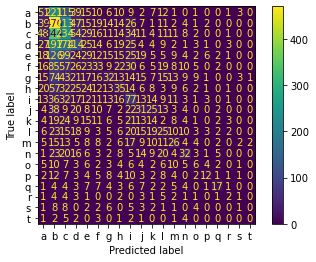

The Kappa of your model is: 0.12


In [21]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

In [22]:
print(classification_report(y_test, predictions, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j','k','l','m','n','o','p','q','r','s','t']))

              precision    recall  f1-score   support

           a       0.18      0.10      0.13       503
           b       0.27      0.53      0.35       885
           c       0.21      0.28      0.24       832
           d       0.25      0.18      0.21       628
           e       0.11      0.07      0.09       416
           f       0.17      0.09      0.12       356
           g       0.20      0.10      0.13       318
           h       0.18      0.13      0.15       268
           i       0.21      0.27      0.24       282
           j       0.17      0.16      0.16       198
           k       0.10      0.09      0.09       161
           l       0.13      0.13      0.13       194
           m       0.19      0.17      0.18       149
           n       0.28      0.19      0.22       172
           o       0.12      0.07      0.09        86
           p       0.34      0.13      0.19        89
           q       0.45      0.22      0.29        78
           r       0.12    

## 3.3. Model 2 - KNN

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

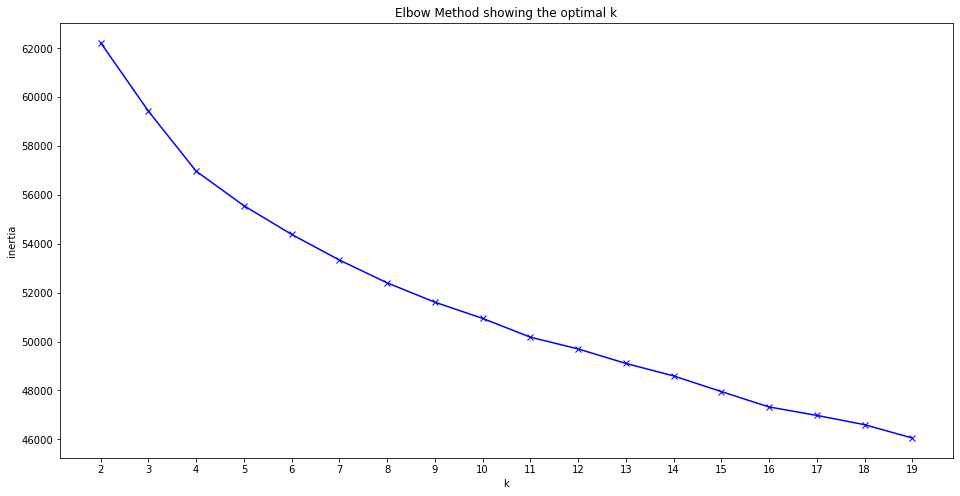

In [23]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [24]:
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
predict = neigh.predict(X_test)

<ipython-input-24-c422c9208e84>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)


The accuracy of the model on test set is: 0.55 
[[265  85  60  35   8  17   2   6   7   3   1   1   3   4   2   2   1   0
    0   1]
 [ 97 534  84  46  35  24  14  18  12   3   6   2   5   0   3   0   1   0
    0   1]
 [ 63 154 449  41  47  24  14   7   5  12   8   2   2   3   0   0   0   0
    0   1]
 [ 30  85  85 350  29  18  10   7   1   2   3   2   2   0   0   2   0   0
    1   1]
 [ 34  50  40  21 232  17   7   4   2   1   1   1   0   1   4   0   0   0
    1   0]
 [ 31  42  23  27  21 180  11  11   0   5   3   0   0   2   0   0   0   0
    0   0]
 [ 12  33  29  28  13  12 164  11   5   2   0   0   2   0   0   3   0   0
    4   0]
 [ 14  32  18  12  18   7  13 135  11   4   3   0   0   0   0   1   0   0
    0   0]
 [ 12  34  16  14   7   6   6  22 152   3   4   0   1   2   2   0   0   0
    0   1]
 [  9  16  15   4   5   2   5   3   7 110  11   7   2   0   0   0   1   0
    0   1]
 [  3   9   4   6   5   3   1  10   5   4  98   1   1   2   7   2   0   0
    0   0]
 [  1   9  14  11

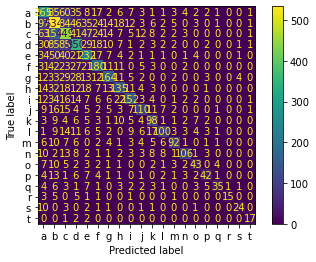

The Kappa of your model is: 0.50


In [25]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
plot_confusion_matrix(neigh, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predict)))

In [26]:
print(classification_report(y_test, predictions, labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']))

              precision    recall  f1-score   support

           a       0.18      0.10      0.13       503
           b       0.27      0.53      0.35       885
           c       0.21      0.28      0.24       832
           d       0.25      0.18      0.21       628
           e       0.11      0.07      0.09       416
           f       0.17      0.09      0.12       356
           g       0.20      0.10      0.13       318
           h       0.18      0.13      0.15       268
           i       0.21      0.27      0.24       282
           j       0.17      0.16      0.16       198
           k       0.10      0.09      0.09       161
           l       0.13      0.13      0.13       194
           m       0.19      0.17      0.18       149
           n       0.28      0.19      0.22       172
           o       0.12      0.07      0.09        86
           p       0.34      0.13      0.19        89
           q       0.45      0.22      0.29        78
           r       0.12    

## 3.4. Model 3 - Random Forest Classifier

In [27]:
forest = RandomForestClassifier()

In [28]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
pred = clf.predict(X_test)

<ipython-input-28-be64b4b0ac71>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)


* I will save the model into a pickle file to apply it later on user input to return predictions

In [29]:
with open('W9-project-model-class-15-ohe.pkl', 'wb') as file:
    pickle.dump(clf, file)

The accuracy of the model on test set is: 0.59 
[[246  85  58  43  11   6   4  12   8   5   5   1   4   6   2   1   1   2
    2   1]
 [ 48 559 103  46  32  18  16  21  12   5   5   3   8   0   2   2   2   1
    2   0]
 [ 35 116 486  49  48  22  21  21   6   6   9   4   2   3   2   0   1   0
    0   1]
 [ 13  73  76 369  34  17  17   7   4   6   7   1   4   0   0   0   0   0
    0   0]
 [ 16  56  32  20 236  22   5  13   3   0   1   2   0   3   6   0   0   0
    1   0]
 [ 19  34  25  23  24 197   6  13   1   6   2   1   0   1   2   0   0   1
    1   0]
 [  6  19  19  26  14  21 174  11   4   2   1   5  14   0   0   1   0   0
    1   0]
 [  6  26   6   8   8  11  15 155  16   7   6   2   0   1   0   1   0   0
    0   0]
 [  3  24  12   7   6   7   8  20 167   7   6   5   1   4   3   0   0   0
    1   1]
 [  3   5   7   4   7   0   2   7  15 130   7   6   4   0   0   1   0   0
    0   0]
 [  1   3   5   3   3   6   0   9   5   3 103   3   2   4   6   2   3   0
    0   0]
 [  1  12  14   2

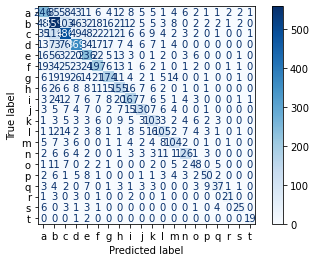

The Kappa of your model is: 0.55


In [33]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  # doctest: +SKIP
plt.savefig('confusion_matrix_class_15.png', dpi=300, bbox_inches='tight')
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, pred)))

In [31]:
print(classification_report(y_test, pred, labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']))

              precision    recall  f1-score   support

           a       0.59      0.49      0.53       503
           b       0.53      0.63      0.58       885
           c       0.56      0.58      0.57       832
           d       0.60      0.59      0.59       628
           e       0.52      0.57      0.55       416
           f       0.58      0.55      0.57       356
           g       0.64      0.55      0.59       318
           h       0.53      0.58      0.55       268
           i       0.64      0.59      0.62       282
           j       0.68      0.66      0.67       198
           k       0.57      0.64      0.60       161
           l       0.65      0.54      0.59       194
           m       0.67      0.70      0.68       149
           n       0.78      0.73      0.75       172
           o       0.59      0.56      0.57        86
           p       0.68      0.56      0.61        89
           q       0.66      0.47      0.55        78
           r       0.78    